##Gemini-3 responses to Diagram-Essential Questions

In [ ]:
!pip install --upgrade gspread gspread_dataframe
import os
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata
GEMINI_API_KEY=userdata.get('LLM_JUDGE')
import google.generativeai as genai
from google.genai.types import ThinkingConfig, ThinkingLevel
from PIL import Image
import json
from google import genai
from google.genai import types
import time
import pickle
import gspread
import pandas as pd
from google.colab import auth
from google.auth import default
from gspread_dataframe import get_as_dataframe
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
import base64
import mimetypes
from typing import List, Optional

###Gemini-3-pro responses code

In [2]:
def gemini_prompt_with_image(prompt,image_path):
  client = genai.Client(api_key=GEMINI_API_KEY)
  with open(image_path, "rb") as f:
    image_bytes = f.read()
  response = client.models.generate_content(
    model="gemini-3-pro-preview",
    contents=[
        types.Part(text=prompt),
        types.Part.from_bytes(data=image_bytes, mime_type="image/png")
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(thinking_level="low"),
        max_output_tokens=5000
    )
)
  return response.text

In [ ]:
chapters = [
  'Chapter_2_Vectors_2',
  'Chapter_5_Newton_laws_of_motion_4',
  'Chapter_6_Applications_of_Newton_Laws_9',
  'Chapter_7_Work_and_Kinetic_Energy_1',
  'Chapter_8_Potential_Energy_and_Conservation_of_energy_3',
  'Chapter_9_Linear_Momentum_and_Collisions_4',
  'Chapter_10_Fixed_Axis_Rotation_6',
  'Chapter_11_Angular_Momentum_2',
  'Chapter_12_Static_Equilibrium_and_Elasticity_10',
  'Chapter_14_Fluid_Mechanics_1',
  'Chapter_17_Sound_2']

In [ ]:
start_time = time.time()
output_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/gemini_answers_diagram_essential_questions_pretty.txt"
base_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Correct_Freq/"
json_output_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/gemini_answers_intermediate.json" # New JSON path
gemini_answers = {}
with open(output_path, "w", encoding="utf-8") as f:
  #chapters = sorted(os.listdir(base_path))
  #chapters = ['Chapter_17_Sound_2','Chapter_2_Vectors_2','Chapter_7_Work_and_Kinetic_Energy_1']
  for chapter in chapters:
    gemini_answers[chapter] = {}
    chapter_path = base_path+chapter
    questions = sorted(os.listdir(chapter_path))
    f.write(f"{chapter}\n")
    f.write("-" * 32 + "\n\n")
    for question in questions:
      question_path = chapter_path+"/"+question
      print(chapter,question)
      prompt = (
      "You are an expert physics professor. "
      "Solve the problem and all sub-parts step-by-step. "
      "For each part: write the key equation then substitute numbers and then compute. "
      "State assumptions if needed. "
      "Round your calculations to 2 decimal places. "
      "Be precise and concise—no extra commentary. "
      "No Latex, give answer in human readable format"
      )
      response = gemini_prompt_with_image(prompt,question_path+"/q.png")
      gemini_answers[chapter][question] = response
      f.write(f"{question}\n")
      f.write("-" * 19 + "\n")
      f.write(response.strip() + "\n\n")
      f.flush()
      with open(json_output_path, "w", encoding="utf-8") as jf:
        json.dump(gemini_answers, jf, indent=4, ensure_ascii=False)

    f.write("\n")


end_time = time.time()
elapsed_time = end_time - start_time
print(f"\nDone! Total execution time: {elapsed_time:.2f} seconds ({elapsed_time/60:.2f} minutes)")




Chapter_2_Vectors_2 37
Chapter_2_Vectors_2 53
Chapter_5_Newton_laws_of_motion_4 39
Chapter_5_Newton_laws_of_motion_4 79
Chapter_5_Newton_laws_of_motion_4 81
Chapter_5_Newton_laws_of_motion_4 87
Chapter_6_Applications_of_Newton_Laws_10 109
Chapter_6_Applications_of_Newton_Laws_10 123
Chapter_6_Applications_of_Newton_Laws_10 125
Chapter_6_Applications_of_Newton_Laws_10 29
Chapter_6_Applications_of_Newton_Laws_10 45
Chapter_6_Applications_of_Newton_Laws_10 51
Chapter_6_Applications_of_Newton_Laws_10 61
Chapter_6_Applications_of_Newton_Laws_10 73
Chapter_6_Applications_of_Newton_Laws_10 93
Chapter_6_Applications_of_Newton_Laws_10 95
Chapter_7_Work_and_Kinetic_Energy_1 101
Chapter_8_Potential_Energy_and_Conservation_of_energy_3 19
Chapter_8_Potential_Energy_and_Conservation_of_energy_3 49
Chapter_8_Potential_Energy_and_Conservation_of_energy_3 83
Chapter_9_Linear_Momentum_and_Collisions_4 118
Chapter_9_Linear_Momentum_and_Collisions_4 53
Chapter_9_Linear_Momentum_and_Collisions_4 55
Chapter

In [ ]:
666/45

14.8

###LLM-as-a-judge

In [ ]:
# judge params: gpt/gemini response (jsons) ; labeled output (google sheet) ; golden answer (image) ; prompt
# Need to check if LLM-as-a-judge is 100% accurate
# Loop through 45 q
# gpt/gemini response (jsons) = key is chapter name + question number
# golden answer = chapter name is folder ; files are question numbers
# labeled output = let's create json with chapter name + question number as key

####gpt/claude response (jsons)

In [ ]:
chapters_keys_gpt_and_claude = {
  '2':'Chapter_2_Vectors_4',
  '5':'Chapter_5_Newton_laws_of_motion_12',
  '6':'Chapter_6_Applications_of_Newton_Laws_18',
  '7':'Chapter_7_Work_and_Kinetic_Energy_5',
  '8':'Chapter_8_Potential_Energy_and_Conservation_of_energy_8',
  '9':'Chapter_9_Linear_Momentum_and_Collisions_11',
  '10':'Chapter_10_Fixed_Axis_Rotation_15',
  '11':'Chapter_11_Angular_Momentum_6',
  '12':'Chapter_12_Static_Equilibrium_and_Elasticity_13',
  '14':'Chapter_14_Fluid_Mechanics_5',
  '17':'Chapter_17_Sound_7'}

chapters_keys_gemini = {
  '2':'Chapter_2_Vectors_2',
  '5':'Chapter_5_Newton_laws_of_motion_4',
  '6':'Chapter_6_Applications_of_Newton_Laws_10',
  '7':'Chapter_7_Work_and_Kinetic_Energy_1',
  '8':'Chapter_8_Potential_Energy_and_Conservation_of_energy_3',
  '9':'Chapter_9_Linear_Momentum_and_Collisions_4',
  '10':'Chapter_10_Fixed_Axis_Rotation_6',
  '11':'Chapter_11_Angular_Momentum_2',
  '12':'Chapter_12_Static_Equilibrium_and_Elasticity_10',
  '14':'Chapter_14_Fluid_Mechanics_1',
  '17':'Chapter_17_Sound_2'}


gpt_5_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/GPT_answers_diagram_based_questions.json"
claude_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/anthropic_answers_diagram_based_questions.json"
gemini_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/gemini_answers_intermediate.json"

with open(gpt_5_path, "r", encoding="utf-8") as f:
  gpt5 = json.load(f)

with open(claude_path, "r", encoding="utf-8") as f:
  claude = json.load(f)

with open(gemini_path, "r", encoding="utf-8") as f:
  gemini_responses = json.load(f)

####Code to create groundtruth labels

In [ ]:
sh = gc.open_by_url("https://docs.google.com/spreadsheets/d/1Q1l4hxWjlCJdX2Q_Yaw_W6S3Ep0-Mpxe7EJWqft6eJ0/")

worksheet = sh.sheet1
data = worksheet.get_all_values()

In [ ]:
data[0]

['Chapter #',
 'Question #',
 'Diagram',
 'Output Result (Right/Wrong) [GPT-5]',
 'Output Result (Right/Wrong) [Sonnet-4.5]',
 'Error Category']

In [ ]:
lbled_output = {}
for i in range(1,len(data)):
  chapter_number,question_number,diagram,gpt_correctness,sonnet_correctness,_ = data[i]
  if diagram == 'Essential':
    if chapter_number not in lbled_output:
      lbled_output[chapter_number] = {}
    lbled_output[chapter_number][question_number] = {
        "gpt":gpt_correctness,
        "sonnet":sonnet_correctness
    }

In [ ]:
output_directory = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets"
output_filename = "lbled_output.pkl"
output_filepath = f"{output_directory}/{output_filename}"

with open(output_filepath, 'wb') as f:
    pickle.dump(lbled_output, f)

print(f"'lbled_output' dictionary saved as '{output_filepath}'")

'lbled_output' dictionary saved as '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/lbled_output.pkl'


####Load labels

In [ ]:
output_directory = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets"
output_filename = "lbled_output.pkl"
output_filepath = f"{output_directory}/{output_filename}"

with open(output_filepath, 'rb') as f:
    loaded_lbled_output = pickle.load(f)

total_questions = 0
for k in loaded_lbled_output.keys():
  total_questions += len(loaded_lbled_output[k])


print(f"Successfully loaded object from '{output_filepath}'")
print(f"Keys of loaded object: {loaded_lbled_output.keys()}")
print(f"Total questions:  {total_questions}")

Successfully loaded object from '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/lbled_output.pkl'
Keys of loaded object: dict_keys(['2', '5', '6', '7', '8', '9', '10', '11', '12', '14', '17'])
Total questions:  45


####LLM-as-a-judge Loop


In [ ]:
def LLM_Judge(model_response, image_path):
    client = genai.Client(api_key=GEMINI_API_KEY)

    with open(image_path, "rb") as f:
        image_bytes = f.read()

    system_prompt = """
You are an answer verification system.

Your task is to compare the ground truth answer extracted from the image
with the model answer provided in the JSON and return a binary verdict.

Core Instructions:
1. Extract the ground truth answer exactly as shown in the image.
2. Read the model’s answer from the provided JSON.
3. Compare all subparts (if the question has multiple parts).
4. If even one subpart is incorrect, incomplete, or missing, the verdict MUST be Wrong.
5. Do not infer intent or give partial credit.

Semantic Equivalence Requirement (MANDATORY):
Before deciding Correct or Wrong, you MUST check whether the ground truth
and model answer are semantically equivalent even if expressed in different valid forms.
You MUST normalize both answers into a common canonical representation before comparison.

Acceptable equivalence transformations include (when applicable):
- Vector representations: Cartesian components (ai + bj), magnitude–direction form,
  unit-vector form, or polar vs Cartesian. Convert one representation into the other
  and compare consistently.
- Reference frame differences: If each answer explicitly states a different origin or
  reference point, transform coordinates into the same reference frame before comparison.
- Algebraic equivalence: Simplified vs unsimplified expressions, factored vs expanded forms,
  exact vs approximate values (e.g., sqrt(2) vs 1.414).
- Derived equivalence: If one answer gives magnitude and direction, compute the implied
  components (or vice versa) and compare.

Numeric Tolerance Rule (apply AFTER canonicalization):
- Minor numerical differences caused by rounding or approximation MUST be treated as Correct.
- Use a reasonable tolerance (approximately 1% relative difference or small absolute error),
  unless the problem explicitly requires exact precision.
- Examples of acceptable matches: 5 vs 4.99, 3.28 vs 3.29, 25 vs 24.85.

Disallowed Equivalence:
- Do NOT mark Correct if equivalence would require changing physical assumptions,
  ignoring stated reference frames, flipping axes without justification,
  or inventing unstated transformations.

Output Rules:
1. Output exactly one line.
2. Use the following format verbatim:
   verdict: <Correct|Wrong>, ground_truth: <value>, model_answer: <value>
3. If there are multiple subparts, list them as comma-separated pairs.
4. Only output the final line. Do not include explanations, reasoning, or extra text.

Example:
verdict: Correct, ground_truth: a=3, b=7, model_answer: a=2.98, b=6.99
"""

    response = client.models.generate_content(
        model="gemini-3-pro-preview",
        contents=[
            types.Part(text=model_response),
            types.Part.from_bytes(data=image_bytes, mime_type="image/png")
        ],
        config=types.GenerateContentConfig(
            system_instruction=system_prompt,
            thinking_config=types.ThinkingConfig(thinking_level="HIGH"),
            max_output_tokens=7000
        )
    )

    return response.text

In [ ]:
# golden answer (image) looping with labeled output (google sheet) looping with gpt and sonnet responses (jsons) [DONE]
# Need to check if LLM-as-a-judge is 100% correct [DONE]
# Then get gemini responses checked
none_lis = [['12','71'],['12','77'],['12','79'],['14','89'],['6','61']]
base_path = '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Correct_Freq/'
for folder_name in sorted(os.listdir(base_path)):
  chapter_path = base_path + folder_name
  for question_number in sorted(os.listdir(chapter_path)):
    chapter_number = folder_name.split('_')[1]
    if [chapter_number,question_number] not in none_lis:
      pass
    else:
      gpt5_response = gpt5[chapters_keys_gpt_and_claude[chapter_number]][question_number]
      sonnet_response = claude[chapters_keys_gpt_and_claude[chapter_number]][question_number]
      print(f"LABELED ANSWER: Chap # {chapter_number} Q # {question_number} {loaded_lbled_output[chapter_number][question_number]}")
      ans_path = chapter_path + '/' + question_number + '/a.png'
      judge_resonse_gpt = LLM_Judge(gpt5_response,ans_path)
      judge_resonse_sonnet = LLM_Judge(sonnet_response,ans_path)
      print(f"LLM JUDGE RESPONSE (GPT): {judge_resonse_gpt}")
      print(f"LLM JUDGE RESPONSE (Sonnet): {judge_resonse_sonnet}")

LABELED ANSWER: Chap # 12 Q # 71 {'gpt': '', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (GPT): verdict: Correct, ground_truth: a. corner 66.7 N at 30°, floor 177 N at 109°, b. μ_s = 0.346, model_answer: a. corner 66.67 N (components 57.74 N, 33.33 N), floor components N=166.67 N f=57.74 N, b. μ_s = 0.35
LLM JUDGE RESPONSE (Sonnet): verdict: Wrong, ground_truth: a. corner force = 66.7 N, b. mu_s = 0.346, model_answer: a. corner force = 115.47 N, b. mu_s = 0.70
LABELED ANSWER: Chap # 12 Q # 77 {'gpt': 'Wrong', 'sonnet': ''}
LLM JUDGE RESPONSE (GPT): verdict: Wrong, ground_truth: 42.2°, model_answer: 13.93°
LLM JUDGE RESPONSE (Sonnet): verdict: Correct, ground_truth: \theta = 42.2^\circ, model_answer: \theta = 42.27^\circ
LABELED ANSWER: Chap # 12 Q # 79 {'gpt': 'Wrong', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (GPT): None
LLM JUDGE RESPONSE (Sonnet): verdict: Wrong, ground_truth: W(l_1/l_2 - 1), W l_1/l_2 + mg, model_answer: F_1 = Wl_1/l_2, F_2 = W(l_1 + l_2)/l_2 + mg
LABELED ANSWER: Chap # 14 Q

In [ ]:
# LLM Judge is 100% correct with a caveat that sometimes it does not give output due to output token limit
# Then get gemini responses checked
none_lis = []
base_path = '/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Correct_Freq/'
for folder_name in sorted(os.listdir(base_path)):
  chapter_path = base_path + folder_name
  for question_number in sorted(os.listdir(chapter_path)):
    chapter_number = folder_name.split('_')[1]
    gemini_response = gemini_responses[chapters_keys_gemini[chapter_number]][question_number]
    print(f"LABELED ANSWER: Chap # {chapter_number} Q # {question_number} {loaded_lbled_output[chapter_number][question_number]}")
    ans_path = chapter_path + '/' + question_number + '/a.png'
    judge_resonse_gemini = LLM_Judge(gemini_response,ans_path)
    if judge_resonse_gemini is None:
      none_lis.append([chapter_number,question_number])
    print(f"LLM JUDGE RESPONSE (Gemini): {judge_resonse_gemini}")




LABELED ANSWER: Chap # 10 Q # 115 {'gpt': 'Wrong', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (Gemini): verdict: Wrong, ground_truth: I = 8.8 kg·m^2, omega = 1.23 rad/s, model_answer: I = 9.33 kg·m^2, omega = 1.22 rad/s
LABELED ANSWER: Chap # 10 Q # 123 {'gpt': 'Wrong', 'sonnet': ''}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: \frac{2}{5} mR^2, model_answer: \frac{2}{5} m R^2
LABELED ANSWER: Chap # 10 Q # 65 {'gpt': '', 'sonnet': ''}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: 7/36 mL^2, model_answer: (7/36)mL^2
LABELED ANSWER: Chap # 10 Q # 75 {'gpt': '', 'sonnet': ''}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: 1.67 kg, model_answer: 1.67 kg
LABELED ANSWER: Chap # 10 Q # 77 {'gpt': 'Wrong', 'sonnet': 'Wrong'}
LLM JUDGE RESPONSE (Gemini): verdict: Correct, ground_truth: τ1 = -9.0 N·m, τ2 = 3.46 N·m, τ3 = 0, τ4 = -3.38 N·m, τ_net = -8.92 N·m, model_answer: τ1 = -9.00 N·m, τ2 = 3.46 N·m, τ3 = 0.00 N·m, τ4 = -3.38 N·m, τ_net = -8.92 N·m
LABEL

In [ ]:
# Chap # 10 Q # 115 [JUDGED INCORRECTLY]
# Chap # 12 Q # 81
# Chap # 6 Q # 61
# Chap # 6 Q # 95
# Chap # 7 Q # 101
# Chap # 9 Q # 118

###Interventions

In [6]:
history: list[types.Content] = []
client = genai.Client(api_key=GEMINI_API_KEY)

def reset_history(system_message: str = ""):
    """
    Reset chat history with a fresh system prompt.
    Gemini does not have a native 'system' role, so this is injected
    as the first user message (standard practice).
    """
    global history
    history = []
    if system_message:
        history.append(
            types.Content(
                role="user",
                parts=[types.Part(text=system_message)]
            )
        )
    return history


# Initialize default history
reset_history()


# -------------------------
# Helper: Read single image as bytes Part (Gemini)
# -------------------------
def encode_image(image_path: Optional[str]):
    if not image_path:
        return []

    mime, _ = mimetypes.guess_type(image_path)
    mime = mime or "image/png"

    with open(image_path, "rb") as f:
        image_bytes = f.read()

    return [types.Part.from_bytes(data=image_bytes, mime_type=mime)]


# -------------------------
# Chat Turn Function (single image optional)
# -------------------------
def chat_turn(user_message: str, image_path: Optional[str] = None) -> str:
    global history

    # Build parts: image (optional) + text
    parts = encode_image(image_path)
    parts.append(types.Part(text=user_message))

    # Add user turn
    history.append(types.Content(role="user", parts=parts))

    # Call Gemini with full conversation history
    response = client.models.generate_content(
        model="gemini-3-pro-preview",
        contents=history,
        config=types.GenerateContentConfig(
            thinking_config=types.ThinkingConfig(thinking_level="low"),
            max_output_tokens=5000,
        ),
    )

    assistant_text = response.text or ""

    # Append assistant response to history
    history.append(
        types.Content(role="model", parts=[types.Part(text=assistant_text)])
    )

    return assistant_text

#### Chap 12 Q 81

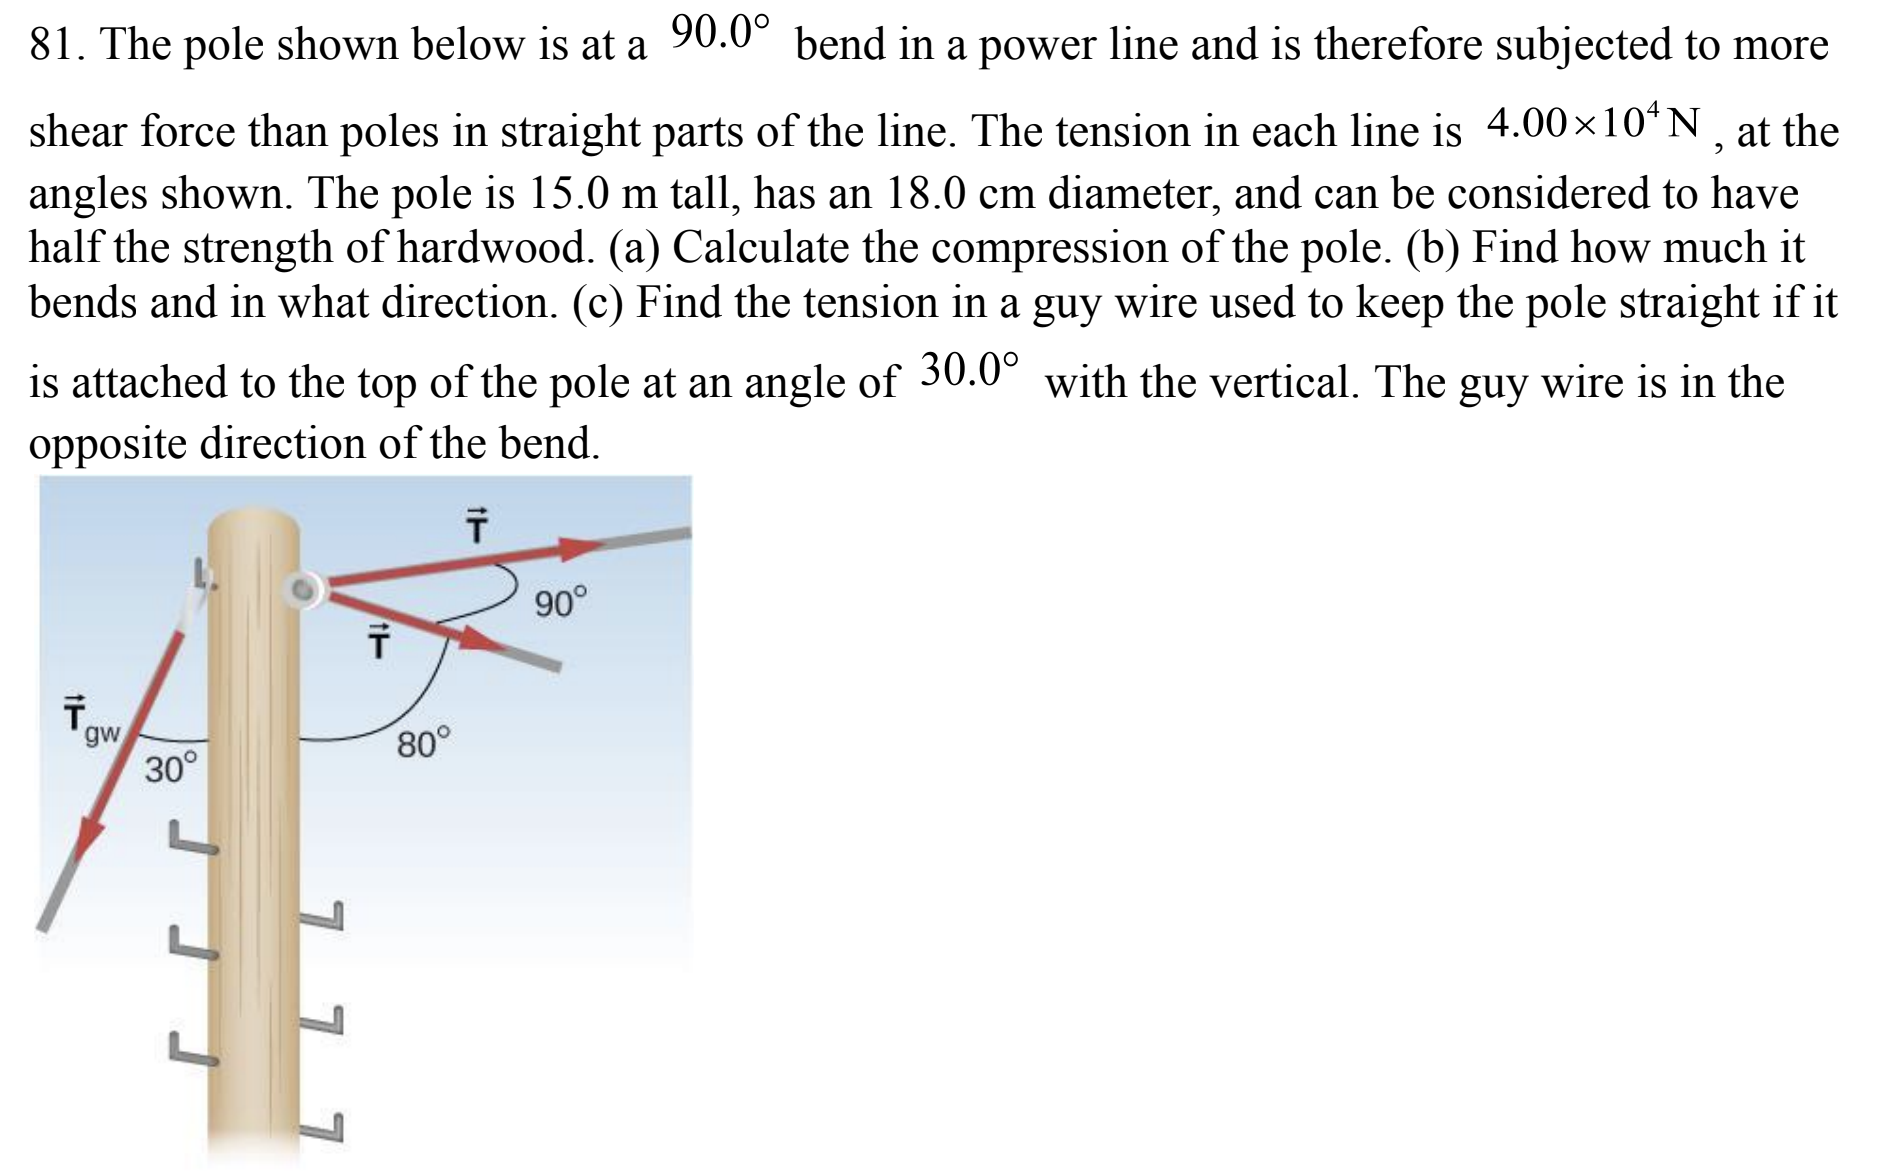

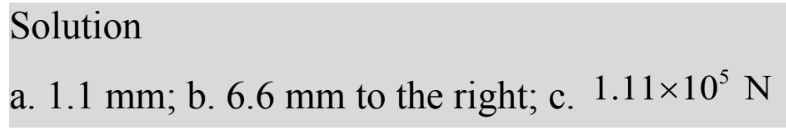

In [13]:
prompt = "Don't solve the question yet. Describe what you observe in the figure AND state your assumptions about the problem"
question_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/81/q.png"
print(chat_turn(prompt,question_path))

Based on the provided image, here is a description of the figure and the necessary assumptions to solve the problem:

### **Observations from the Figure**

*   **Subject:** A tall, cylindrical wooden utility pole with climbing pegs on its side.
*   **Forces:**
    *   There are two power lines attached to the top of the pole, labeled with tension vector $\vec{T}$.
    *   The problem text states the bend in the power line is $90.0^{\circ}$. This means if you look from above (top-down view), the two wires are perpendicular to each other.
    *   However, the side-view diagram shows angles relative to the vertical pole.
        *   One wire is pulled slightly upward at an angle of $90^{\circ}$ relative to the vertical pole (meaning it is horizontal). Wait, looking closer at the diagram: The angle arc labeled $90^{\circ}$ is between the vertical pole and the *top* wire. This indicates the top wire is perfectly horizontal.
        *   The second wire is angled downwards. The arc labeled $8

In [15]:
prompt = """Corrections: 1. Only the 2 wires making 90 degree angle with each other are coplanar 2. Both of those wires are making angle of 80 degree with pole and pointing downward to the ground 3. The wire with tension labeled T_gw is also pointing downward to ground making angle of 30 degree with pole 4. Calculate compression using only vertical tension components 5. For "bending" in the Elasticity chapter, use Shear Deformation not the beam bending formula 6. Young's Modulus (E) for Hardwood is 15 x 10^9 N/m^2 7. Wood is anisotropic (it has grain). Its shear strength is independent of its tensile strength 8. Shear Modulus for Hardwood is 10^10 N/m^2"""

print(chat_turn(prompt))

Based on your corrections and the problem statement, here is the step-by-step solution.

### **Given Data & Parameters**

*   **Height of pole ($L_0$):** $15.0 \text{ m}$
*   **Diameter of pole ($d$):** $18.0 \text{ cm} = 0.18 \text{ m}$
*   **Radius of pole ($r$):** $0.09 \text{ m}$
*   **Tension in power lines ($T$):** $4.00 \times 10^4 \text{ N}$
*   **Angle of power lines to vertical:** $80.0^\circ$ (which means they are $10^\circ$ below the horizontal).
*   **Horizontal separation of power lines:** $90^\circ$ (they are perpendicular in the horizontal plane).
*   **Guy wire angle to vertical:** $30.0^\circ$.
*   **Material Properties (Hardwood values provided, to be halved):**
    *   Young's Modulus ($E_{wood}$) = $15 \times 10^9 \text{ N/m}^2$. Effective $E = 7.5 \times 10^9 \text{ N/m}^2$.
    *   Shear Modulus ($S_{wood}$) = $10 \times 10^9 \text{ N/m}^2$. Effective $S = 5.0 \times 10^9 \text{ N/m}^2$.
*   **Cross-sectional Area ($A$):** $A = \pi r^2 = \pi (0.09)^2 \approx 0.02

In [16]:
reset_history()

[]

####Chap 6 Q61

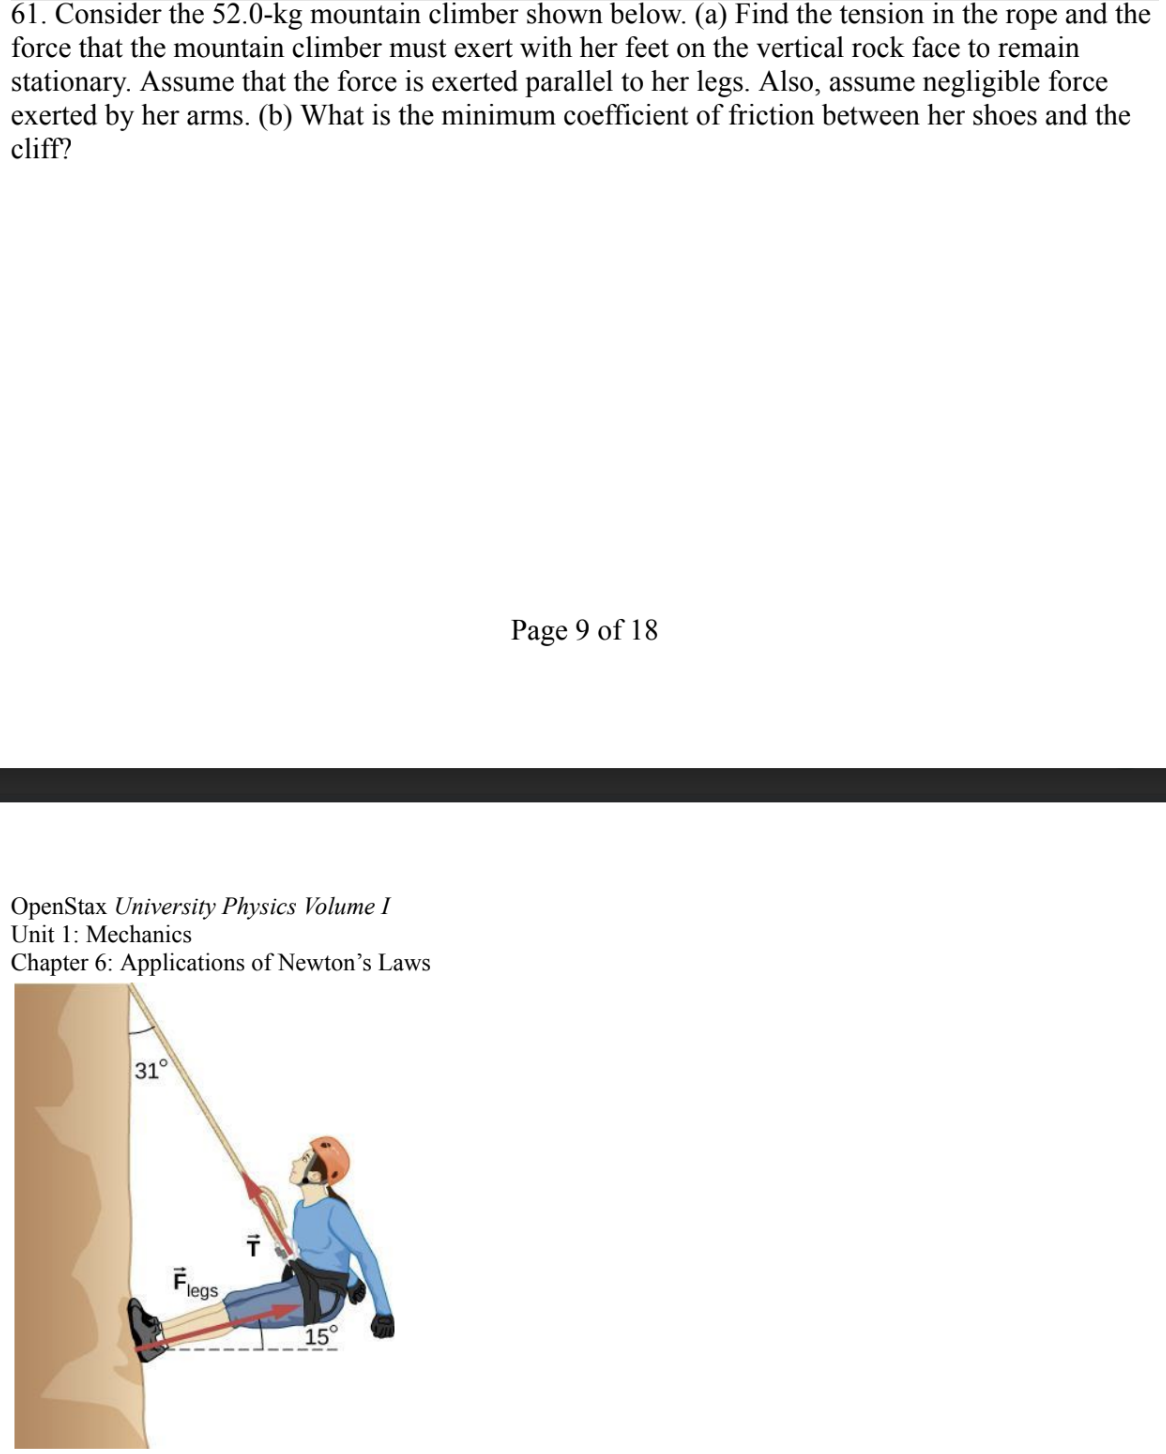

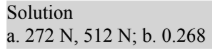

In [22]:
prompt = "Describe what you observe in the figure"
question_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_6_Applications_of_Newton_Laws_15/61/q.png"
print(chat_turn(prompt,question_path))

Based on the provided image, here is a description of what is observed in the figure:

**Textual Content:**
*   **Problem Statement:** The text presents a physics problem labeled "61." It asks to consider a 52.0-kg mountain climber.
    *   **Part (a):** Asks to find the tension in the rope and the force the climber must exert with her feet on the vertical rock face to remain stationary. It gives two assumptions: the force is exerted parallel to her legs, and the force exerted by her arms is negligible.
    *   **Part (b):** Asks for the minimum coefficient of friction between her shoes and the cliff.
*   **Source Information:** Text below the main problem indicates the source is "OpenStax *University Physics Volume I*, Unit 1: Mechanics, Chapter 6: Applications of Newton’s Laws." There is also a page number, "Page 9 of 18."

**Visual Diagram:**
*   **Subject:** The diagram shows a mountain climber hanging from a vertical cliff face.
*   **Orientation:** The cliff is on the left side o

In [23]:
prompt = """Corrections: Climbers legs makes angle of 15 degree with horizontal"""

print(chat_turn(prompt))

Based on the physics problem presented in the image, here is the step-by-step solution.

### **Given Data:**
*   **Mass of climber ($m$):** $52.0 \text{ kg}$
*   **Angle of the rope ($\theta_{\text{rope}}$):** $31^\circ$ with the vertical.
*   **Angle of the legs ($\theta_{\text{legs}}$):** $15^\circ$ below the horizontal.
*   **Gravity ($g$):** $9.80 \text{ m/s}^2$

---

### **Part (a): Find the tension in the rope ($T$) and the force exerted by her legs ($F_{\text{legs}}$).**

To solve this, we treat the climber as a point particle in static equilibrium. This means the sum of all forces acting on her is zero ($\Sigma F = 0$).

**1. Identify the Forces:**
*   **Gravity ($W$):** Acts straight down. $W = mg = (52.0 \text{ kg})(9.8 \text{ m/s}^2) = 509.6 \text{ N}$.
*   **Tension ($T$):** Acts along the rope, $31^\circ$ from the vertical (or $90^\circ + 31^\circ = 121^\circ$ from the positive x-axis, if standard position is used, but breaking it into components is easier).
*   **Force of

In [24]:
prompt = "Solve the question"
print(chat_turn(prompt))

Based on the physics principles of static equilibrium, here is the step-by-step solution to the problem.

### **Given Data:**
*   **Mass ($m$):** $52.0 \text{ kg}$
*   **Gravitational Acceleration ($g$):** $9.80 \text{ m/s}^2$
*   **Angle of Rope ($\theta_1$):** $31^\circ$ (with the vertical cliff face).
*   **Angle of Legs ($\theta_2$):** $15^\circ$ (below the horizontal).

---

### **Part (a): Find the tension in the rope and the force exerted by the legs.**

The climber is stationary, meaning the system is in equilibrium. The sum of all forces acting on her must equal zero ($\sum \vec{F} = 0$).

**1. Identify the Forces:**
*   **Weight ($W$):** Acts straight down.
    $$W = mg = (52.0 \text{ kg})(9.80 \text{ m/s}^2) = 509.6 \text{ N}$$
*   **Tension ($T$):** Acts along the rope, $31^\circ$ from the vertical.
*   **Force of Legs ($F_{\text{legs}}$):** The problem states the force is exerted parallel to her legs. Since her legs are $15^\circ$ below the horizontal, the reaction force f

In [21]:
reset_history()

[]

####Ch 6 Q 95

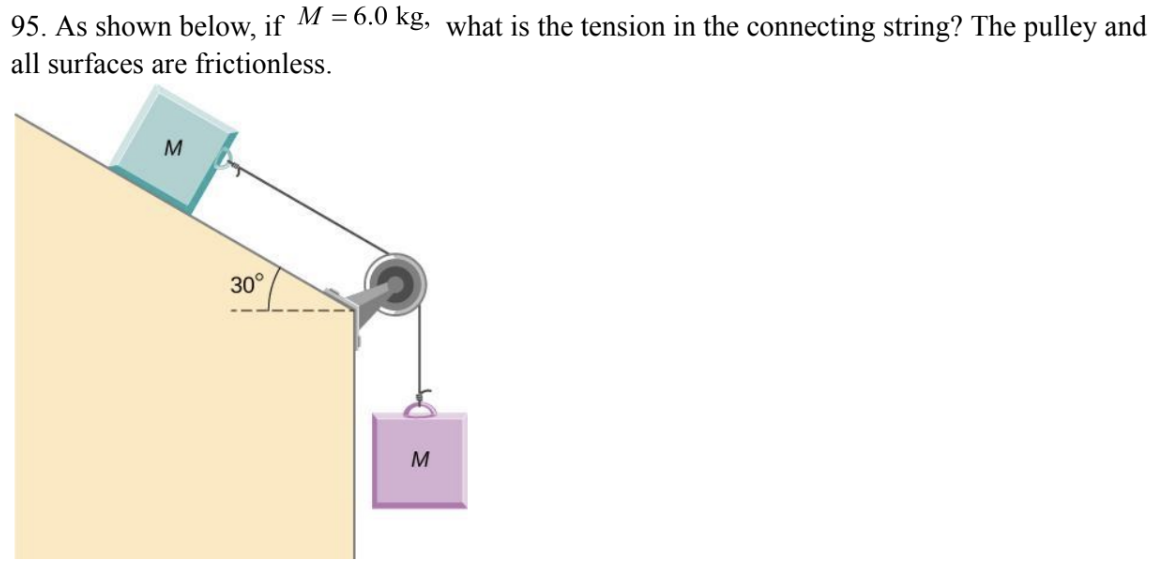

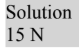

In [28]:
prompt = "Don't solve the question yet. Describe what you observe in the figure AND state your assumptions about the problem"
question_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_6_Applications_of_Newton_Laws_15/95/q.png"
print(chat_turn(prompt,question_path))

Based on the provided image, here is a description of the setup and the necessary assumptions to define the problem.

### **Observations from the Figure:**

*   **System Setup:** The image depicts a classic mechanics problem involving two masses connected by a string over a pulley.
*   **Masses:**
    *   There is a block labeled **$M$** (colored blue) resting on an inclined plane.
    *   There is a second block, also labeled **$M$** (colored purple), hanging vertically.
    *   Since both are labeled with the same variable $M$, they have identical mass. The problem text specifies $M = 6.0 \text{ kg}$.
*   **The Incline:** There is a beige triangular wedge acting as a ramp. The angle of inclination is explicitly marked as **$30^\circ$** relative to the horizontal.
*   **Connections:**
    *   A string connects the blue block on the ramp to the purple hanging block.
    *   The string runs parallel to the surface of the inclined plane.
    *   The string passes over a pulley fixed at t

In [29]:
prompt = """If the block that hangs vertically moves downward then the block on the incline will move downward along the slope (not upward)"""
print(chat_turn(prompt))

This statement is **incorrect**.

Here is why:

The two blocks are connected by a single string with a fixed length.
*   **If the hanging block moves downward**, it pulls the string with it.
*   Because the string length is constant, it must pull the block on the incline **up the slope** towards the pulley.

Conversely, for the block on the incline to move **down the slope**, the string would have to slacken or be pulled from the other side, meaning the hanging block would have to move **upward**.

**Correct Physical Relationship:**
*   Hanging block moves **down** $\rightarrow$ Incline block moves **up** the slope.
*   Hanging block moves **up** $\rightarrow$ Incline block moves **down** the slope.


In [30]:
prompt = """Follow the hint I gave and Solve the question"""
print(chat_turn(prompt))

Based on the "hint" provided in your previous message, you are effectively setting up a specific scenario for the coordinate system, although physically the objects must move together. If the hanging block moves down, the block on the incline *must* move up the ramp.

However, let's solve the problem using standard Newtonian mechanics to find the tension. We will determine the direction of motion based on the forces.

### **Step 1: Identify the Forces**

**For the Hanging Block (Mass $M$):**
*   **Gravity ($F_g$):** Pulling down with force $Mg$.
*   **Tension ($T$):** Pulling up.
*   *Equation of Motion:* Let's assume the hanging block accelerates downward (since it has the full force of gravity acting on it, while the other block only has a component).
    $$F_{\text{net}} = Mg - T = Ma$$  (Equation 1)

**For the Block on the Incline (Mass $M$):**
*   **Gravity ($F_g$):** Pulling down. We need the component parallel to the slope pulling it *down* the ramp. This is $Mg \sin(30^\circ)$.

In [31]:
reset_history()

[]

####Ch 7 Q 101

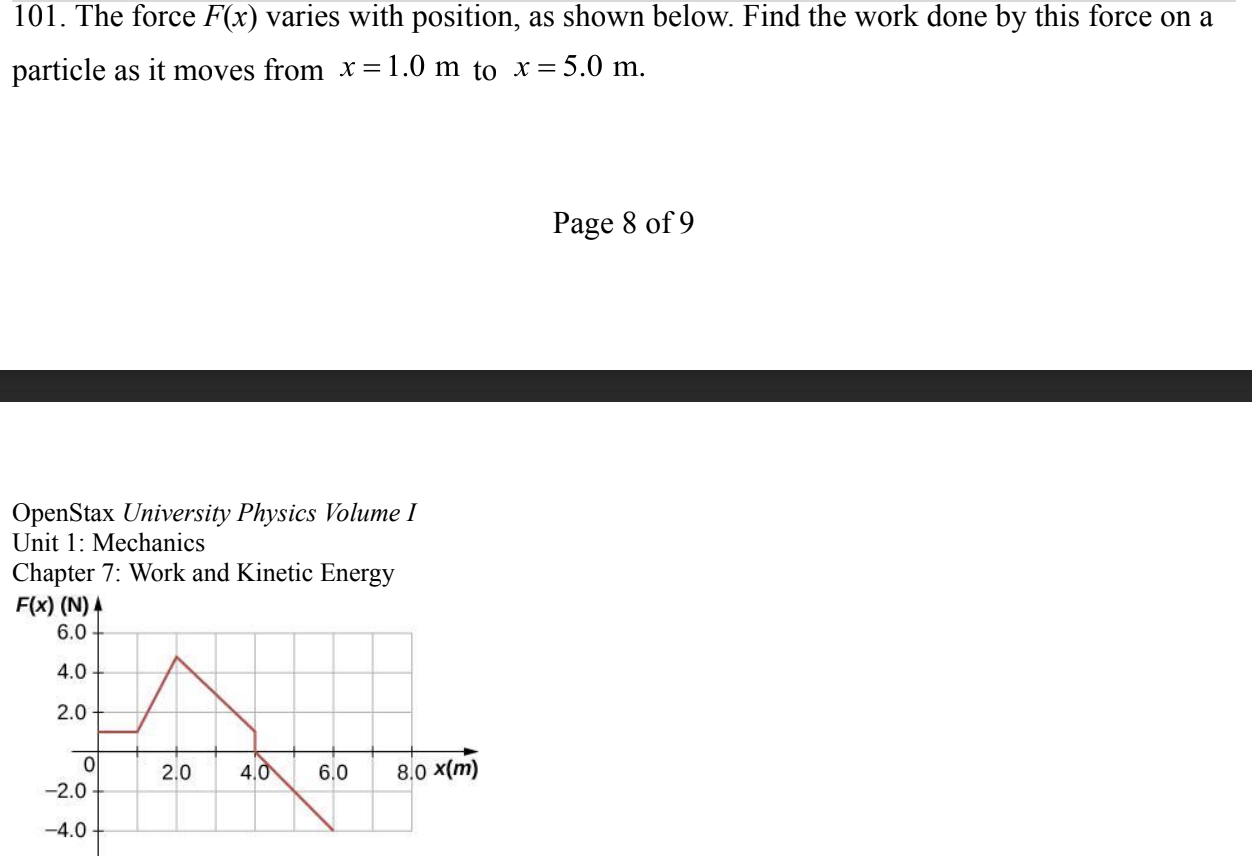

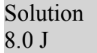

In [32]:
prompt = "Describe what you observe in the figure"
question_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_7_Work_and_Kinetic_Energy_4/101/q.png"
print(chat_turn(prompt,question_path))

Based on the provided image, here is what is observed:

**Problem Statement:**
*   The problem asks to find the work done by a force $F(x)$ on a particle as it moves from a position of $x = 1.0 \text{ m}$ to $x = 5.0 \text{ m}$.
*   The force $F(x)$ is not constant; it varies with position according to the provided graph.

**Graph Analysis:**
*   **Vertical Axis (y-axis):** Represents Force, $F(x)$, measured in Newtons ($\text{N}$). The scale has major grid lines every $2.0 \text{ N}$ and minor grid lines every $1.0 \text{ N}$ (implied, though not explicitly labeled between 2 and 4). The range shown is from $-4.0$ to $6.0$.
*   **Horizontal Axis (x-axis):** Represents position, $x$, measured in meters ($\text{m}$). The scale has major grid lines every $2.0 \text{ m}$, meaning each grid square represents $1.0 \text{ m}$ horizontally.
*   **The Curve (Red Line):**
    *   From $x = 0$ to $x = 1$, the force is constant at $F = 1.0 \text{ N}$.
    *   From $x = 1$ to $x = 2$, the force inc

In [46]:
prompt = """Corrections: a)From x = 0 to x = 1.0 m: The force is constant at F = 1.0 N (horizontal line) b)From x=1 to 2 m it rises from about 1 N to 5 N (peak at x≈2 m). c)At x=4 the force drops from 1 to 0. Then from x=4 to x=6 force linearly decreases from 0 to -4 """
print(chat_turn(prompt))

Thank you for the corrections. Let's re-examine the graph closely based on your specific observations. Interpreting these hand-drawn or schematic textbook graphs can sometimes be tricky, but looking at the specific features you pointed out changes the interpretation significantly.

Here is an updated observation of the figure incorporating your corrections:

**Updated Graph Analysis:**

1.  **Segment $x = 0$ to $x = 1.0$ m:**
    *   The force is indeed a horizontal line at **$F = 1.0 \text{ N}$**. This represents a constant force over this meter.

2.  **Segment $x = 1.0$ to $x = 2.0$ m:**
    *   The graph rises linearly. It starts at $(1.0, 1.0)$ and ends at a peak at $x = 2.0$. The peak value is halfway between grid lines $4.0$ and $6.0$, so the peak force is **$F = 5.0 \text{ N}$**.

3.  **Segment $x = 2.0$ to $x = 4.0$ m:**
    *   This is where the interpretation is critical. You pointed out a specific behavior at $x=4$. Let's look at the line connecting the peak $(2, 5)$ to the 

In [47]:
prompt = """Solve the question """
print(chat_turn(prompt))

Based on the graph and the specific corrections you provided, here is the step-by-step solution to find the work done.

**Concept:**
The work done by a variable force is equal to the **area under the Force vs. Position curve**.
*   Area above the x-axis = **Positive Work**
*   Area below the x-axis = **Negative Work**

We need to calculate the area for the interval $x = 1.0 \text{ m}$ to $x = 5.0 \text{ m}$. We can break this into three geometric shapes based on the changes in the graph's slope.

---

### Step 1: Area from $x = 1.0$ to $x = 2.0$ (Trapezoid)
According to the graph and your correction, the force rises linearly from $1.0 \text{ N}$ to $5.0 \text{ N}$ in this interval. This forms a trapezoid.

*   **Base (width):** $\Delta x = 2.0 - 1.0 = 1.0 \text{ m}$
*   **Height 1 (left):** $1.0 \text{ N}$
*   **Height 2 (right):** $5.0 \text{ N}$
*   **Area 1:** $\frac{1}{2} \times (\text{Height}_1 + \text{Height}_2) \times \text{Base}$
    $$A_1 = \frac{1}{2} \times (1.0 + 5.0) \time

In [48]:
reset_history()

[]

####Ch 9 Q 118

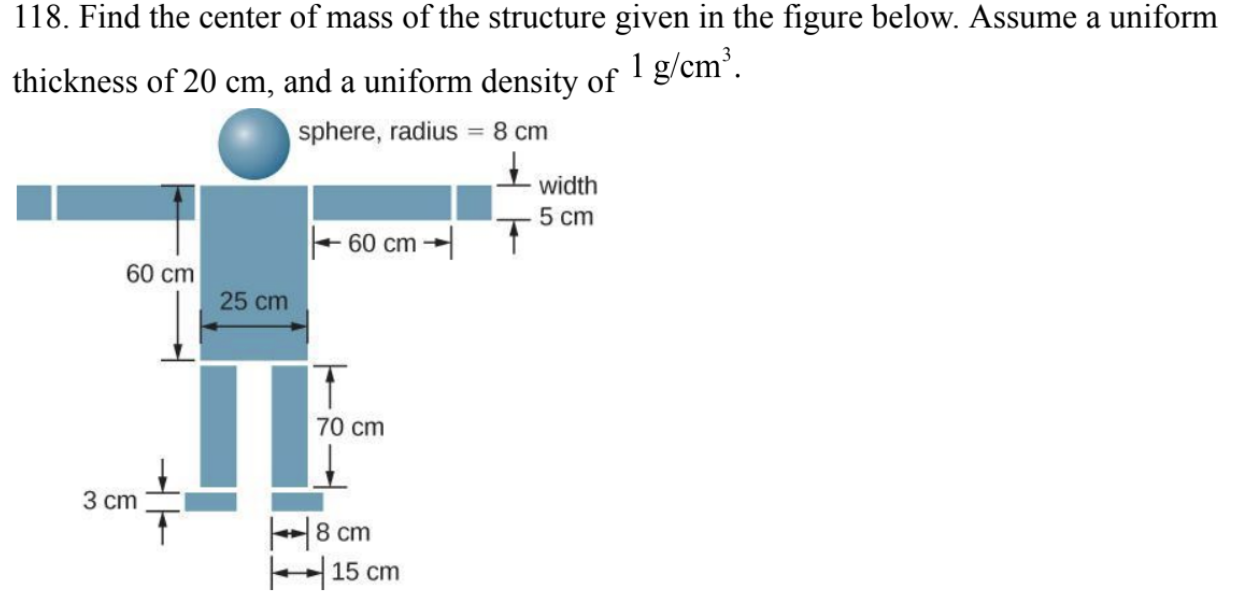

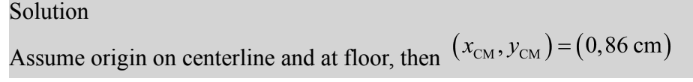

In [49]:
prompt = "Describe what you observe in the figure"
question_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_9_Linear_Momentum_and_Collisions_11/118/q.png"
print(chat_turn(prompt,question_path))

Based on the provided image, here are the observations:

**Problem Statement:**
*   The image presents a physics problem numbered **118**.
*   The goal is to **find the center of mass** of the depicted structure.
*   **Assumptions given:**
    *   The structure has a **uniform thickness of 20 cm**.
    *   The structure has a **uniform density of $1 \text{ g/cm}^3$**.

**Structure Geometry:**
The structure resembles a stylized, blocky human figure composed of several geometric shapes. The dimensions provided are:

*   **Head:**
    *   Represented by a **sphere**.
    *   **Radius = 8 cm**.

*   **Torso (Main Body):**
    *   Represented by a large rectangle.
    *   **Height = 60 cm**.
    *   **Width = 25 cm**.

*   **Arms:**
    *   There are two arms, extending horizontally from the top of the torso.
    *   Each arm consists of two rectangular segments.
    *   **Upper Arm Segment:**
        *   **Length = 60 cm**.
        *   **Width (vertical height) = 5 cm**.
    *   **Outer Ar

In [51]:
prompt = """Corrections: The Outer Arm Segment (Hand/Forearm stub) is 5x5 cm.  """
print(chat_turn(prompt))

Based on your correction, let's refine the description of the arms. You are absolutely right that looking at the proportions, the small block at the end appears to be a square.

Here is the updated breakdown of the structure's geometry with that correction applied:

**Revised Structure Geometry:**

*   **Head:**
    *   Shape: Sphere
    *   Radius: $8 \text{ cm}$

*   **Torso:**
    *   Shape: Rectangle
    *   Height: $60 \text{ cm}$
    *   Width: $25 \text{ cm}$

*   **Arms (Left and Right):**
    *   **Main Arm Segment:**
        *   Shape: Rectangle
        *   Length: $60 \text{ cm}$
        *   Height (width): $5 \text{ cm}$
    *   **Outer Arm Segment (Hand/Stub):**
        *   Shape: Square (as per correction)
        *   Dimensions: $5 \text{ cm} \times 5 \text{ cm}$

*   **Legs (Left and Right):**
    *   Shape: Rectangle
    *   Height: $70 \text{ cm}$
    *   Width: $8 \text{ cm}$ (inferred from the dimension line at the bottom)

*   **Feet (Left and Right):**
    *   Sha

In [52]:
prompt = """Solve the question"""
print(chat_turn(prompt))

To find the center of mass of the structure, we will break the figure down into its simple geometric components (head, torso, arms, hands, legs, and feet).

### **1. Set up the Coordinate System**
Let's place the origin $(0,0)$ on the ground, directly between the two feet.
*   **X-axis:** Horizontal ground line. Because the figure is perfectly symmetric left-to-right, the center of mass lies on the vertical axis of symmetry. Therefore, **$X_{cm} = 0$**.
*   **Y-axis:** Vertical centerline of the body. We need to find **$Y_{cm}$**.

### **2. Calculate Volumes and Masses**
Since the density ($\rho = 1 \text{ g/cm}^3$) is uniform, mass is directly proportional to volume ($m = \rho V$). We can simplify the center of mass formula to work with volumes:
$$Y_{cm} = \frac{\sum V_i y_i}{\sum V_i}$$

*Note: The problem states a uniform thickness of $20 \text{ cm}$ for the structure. However, the head is a **sphere**, so its volume is calculated differently.*

Let's list the components from bottom